* 출처 : https://www.kaggle.com/vernon360961/rfm-cohort-analysis-and-customer-segmentation
* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.shape[0]

541909

In [5]:
missing_percent = pd.DataFrame(df.isnull().mean()*100)
missing_percent = missing_percent.rename(columns={0:'Percentage'})
missing_percent.sort_values(ascending=False, by=['Percentage'])

,Percentage
CustomerID,24.926694
Description,0.268311
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


In [6]:
df["id_null"] = np.where(df["CustomerID"].isnull(), 1, 0)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [7]:
null_by_country = df.groupby("Country")['id_null'].mean().to_frame()
null_by_country = null_by_country.rename(columns={'id_null' : "Percentage"})
null_by_country.sort_values("Percentage", ascending=False) * 100

,Percentage
Country,
Hong Kong,100.000000
Unspecified,45.291480
United Kingdom,26.963861
Israel,15.824916
Bahrain,10.526316
EIRE,8.674963
Switzerland,6.243756
Portugal,2.567479
France,0.771298


<AxesSubplot:>

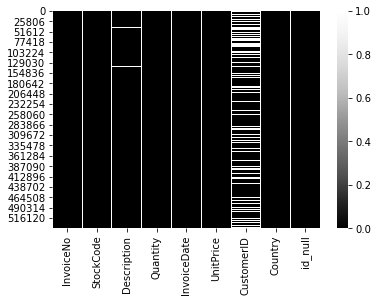

In [8]:
sns.heatmap(df.isnull(), cmap="Greys_r")

In [9]:
print(df.shape[0])
df = df.dropna(subset=["CustomerID"])
df.shape

541909


(406829, 9)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
id_null        0
dtype: int64

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,406829.000000,406829.000000,406829.000000,406829.0
mean,12.061303,3.460471,15287.690570,0.0
std,248.693370,69.315162,1713.600303,0.0
min,-80995.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13953.000000,0.0
50%,5.000000,1.950000,15152.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,38970.000000,18287.000000,0.0


In [12]:
df[df["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,0
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0


In [13]:
df[df["CustomerID"] == 17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,0
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,0
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,0
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,0


In [14]:
df = df[df["Quantity"] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


In [15]:
df = df[df["UnitPrice"] > 0 ]
df.shape

(397884, 9)

In [16]:
print(df.shape)
df = df.drop_duplicates()
df.shape

(397884, 9)


(392692, 9)

In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null
count,392692.000000,392692.000000,392692.000000,392692.0
mean,13.119702,3.125914,15287.843865,0.0
std,180.492832,22.241836,1713.539549,0.0
min,1.000000,0.001000,12346.000000,0.0
25%,2.000000,1.250000,13955.000000,0.0
50%,6.000000,1.950000,15150.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,8142.750000,18287.000000,0.0


In [18]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0


In [19]:
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID,id_null,TotalCost
count,392692.000000,392692.000000,392692.000000,392692.0,392692.000000
mean,13.119702,3.125914,15287.843865,0.0,22.631500
std,180.492832,22.241836,1713.539549,0.0,311.099224
min,1.000000,0.001000,12346.000000,0.0,0.001000
25%,2.000000,1.250000,13955.000000,0.0,4.950000
50%,6.000000,1.950000,15150.000000,0.0,12.450000
75%,12.000000,3.750000,16791.000000,0.0,19.800000
max,80995.000000,8142.750000,18287.000000,0.0,168469.600000


In [21]:
df[df["TotalCost"] > 160000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,0,168469.6


In [22]:
df = df[df["TotalCost"] < 160000].copy()
df.shape

(392691, 10)

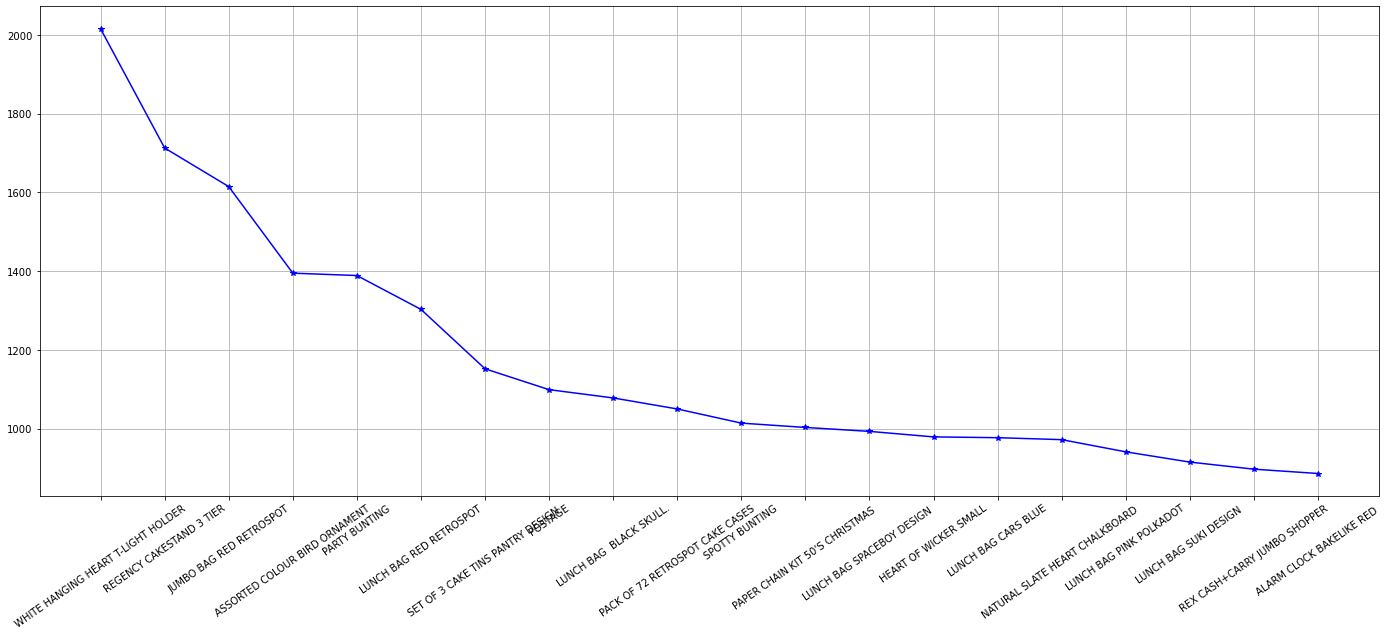

In [23]:
most_purchased_prods = pd.DataFrame(df["Description"].value_counts().head(20))
most_purchased_prods = most_purchased_prods.rename(columns={'Description' : "Count"})

plt.figure(figsize=(24,9))
plt.xticks(rotation=35)                 # 눈금설정
plt.plot(most_purchased_prods, "b*-")   # "b*-"  b : 파란색 / * : 점 모양 / - : 실선
plt.grid()

<AxesSubplot:>

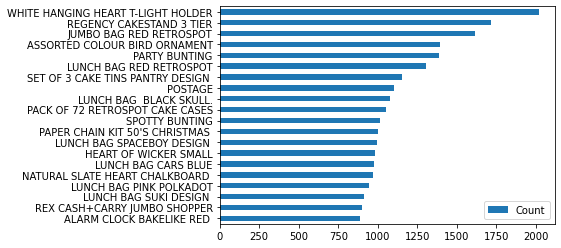

In [24]:
most_purchased_prods.sort_values("Count").plot.barh()

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

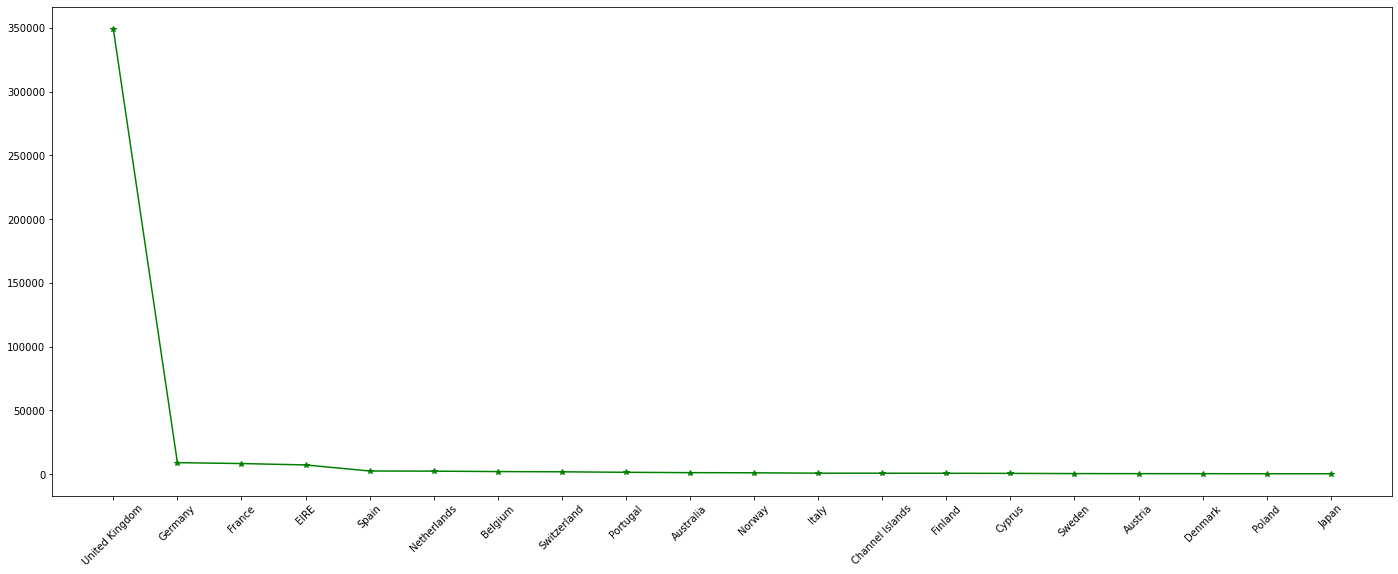

In [25]:
most_purchased_bycountry = pd.DataFrame(df["Country"].value_counts().head(20)).rename(columns={"Country" : "Count"})
# most_purchased_bycountry

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry, 'g*-')
plt.grid

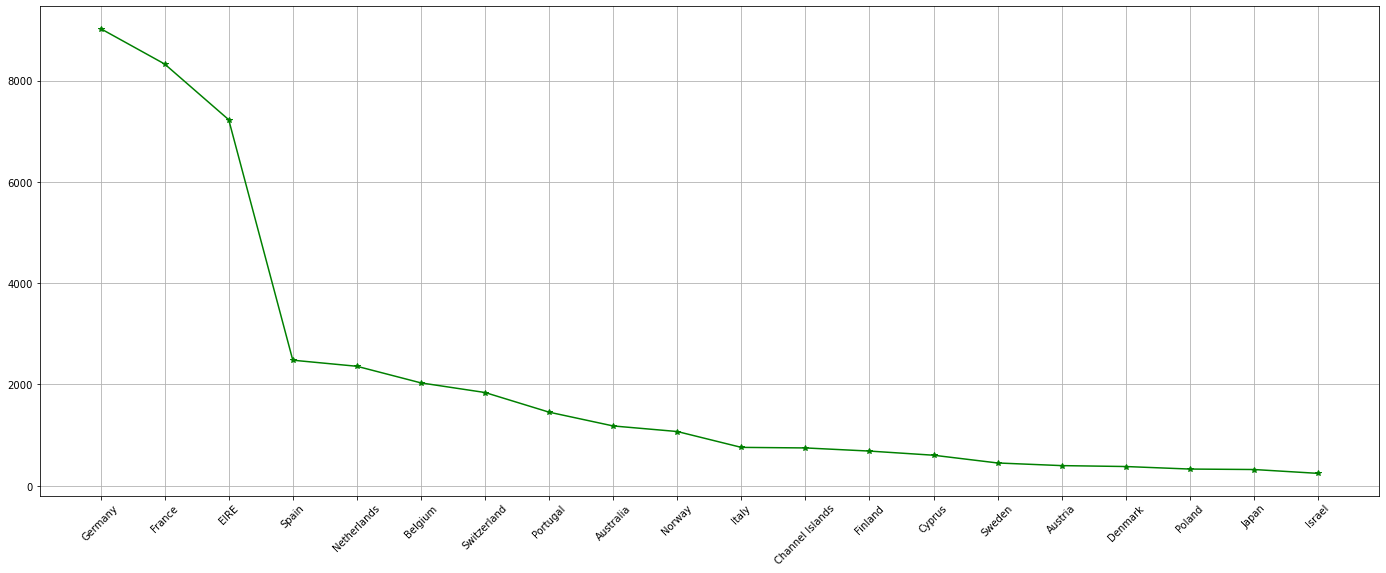

In [26]:
nonuk_df = df[df["Country"] != 'United Kingdom']
most_purchased_bycountry_nonuk = pd.DataFrame(nonuk_df["Country"].value_counts().head(20)).rename(columns={"Country" : "Count"})

plt.figure(figsize=(24, 9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry_nonuk, "g*-")
plt.grid()

In [27]:
# del df["id_null"]

In [28]:
df.nunique()

InvoiceNo      18531
StockCode       3664
Description     3876
Quantity         300
InvoiceDate    17281
UnitPrice        440
CustomerID      4338
Country           37
id_null            1
TotalCost       2938
dtype: int64

In [29]:
df["InvoiceDateCon"] = df["InvoiceDate"].dt.date
df["InvoiceDateCon"].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDateCon, dtype: object

In [30]:
# dtype을 date로 변환
df["InvoiceDateCon"] = pd.to_datetime(df["InvoiceDateCon"])

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01


In [32]:
def get_month(x) : return dt.datetime(x.year, x.month, 1)

In [33]:
df["InvoiceDateCon"] = df["InvoiceDateCon"].apply(get_month)
df["InvoiceDateCon"]

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: InvoiceDateCon, Length: 392691, dtype: datetime64[ns]

In [34]:
df.groupby("CustomerID")["InvoiceDateCon"].transform("min")

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: InvoiceDateCon, Length: 392691, dtype: datetime64[ns]

In [35]:
grouping = df.groupby("CustomerID")["InvoiceDateCon"]
df["CohortMonth"] = grouping.transform("min")

In [36]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0,14.85,2011-12-01,2011-08-01


In [37]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [38]:
invoice_year, invoice_month = get_date_int(df, "InvoiceDateCon")

cohort_year, cohort_month = get_date_int(df, "CohortMonth")

In [39]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [40]:
df["CohortIndex"] = (year_diff * 12) + (month_diff + 1)

In [41]:
df["CohortIndex"]

0         1
1         1
2         1
3         1
4         1
         ..
541904    5
541905    5
541906    5
541907    5
541908    5
Name: CohortIndex, Length: 392691, dtype: int64

In [42]:
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
308285,563945,23297,SET 40 HEART SHAPE PETIT FOUR CASES,16,2011-08-22 10:09:00,1.65,17581.0,United Kingdom,0,26.4,2011-08-01,2010-12-01,9


<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

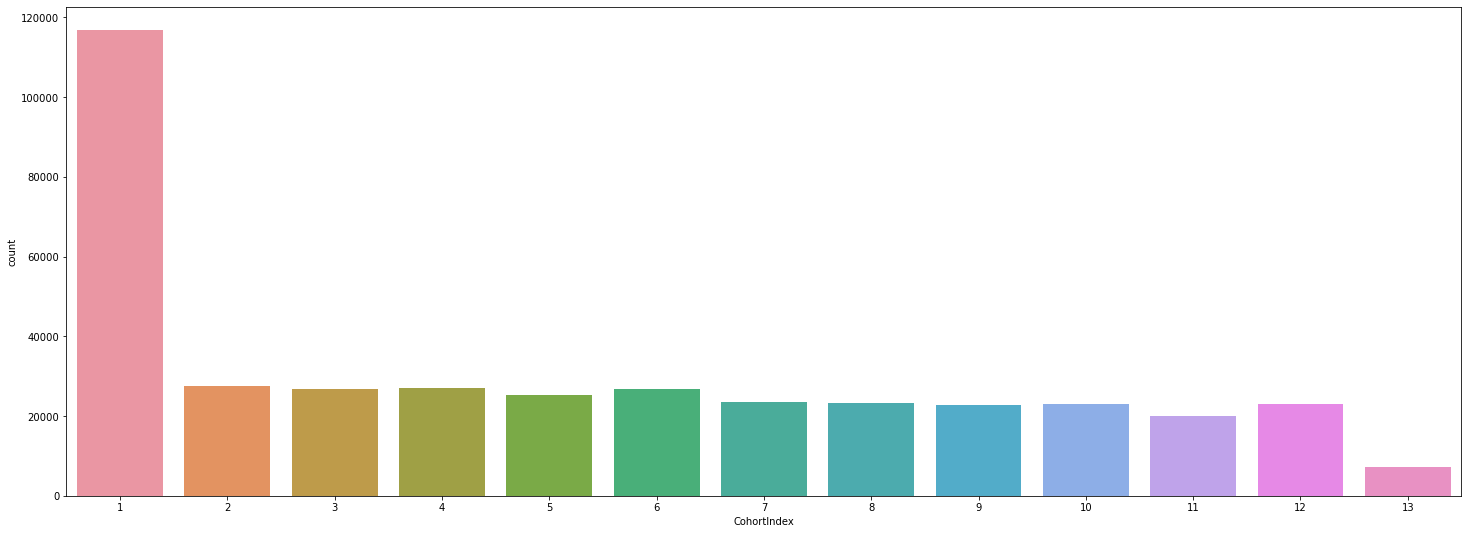

In [43]:
plt.figure(figsize=(25, 9))
sns.countplot(x="CohortIndex", data=df)

In [44]:
df["InvoiceDate"].dt.time

0         08:26:00
1         08:26:00
2         08:26:00
3         08:26:00
4         08:26:00
            ...   
541904    12:50:00
541905    12:50:00
541906    12:50:00
541907    12:50:00
541908    12:50:00
Name: InvoiceDate, Length: 392691, dtype: object

In [45]:
df["TimeOfPurchase"] = df["InvoiceDate"].dt.time
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex,TimeOfPurchase
300854,563214,22846,BREAD BIN DINER STYLE RED,1,2011-08-14 12:56:00,16.95,16370.0,United Kingdom,0,16.95,2011-08-01,2011-04-01,5,12:56:00
353032,567718,23219,LAUREL STAR ANTIQUE SILVER,12,2011-09-22 10:26:00,1.25,17730.0,United Kingdom,0,15.00,2011-09-01,2011-01-01,9,10:26:00
427352,573383,21245,GREEN POLKADOT PLATE,8,2011-10-30 14:18:00,1.69,17447.0,United Kingdom,0,13.52,2011-10-01,2011-09-01,2,14:18:00
82181,543191,22132,RED LOVE HEART SHAPE CUP,5,2011-02-04 11:54:00,0.85,13137.0,United Kingdom,0,4.25,2011-02-01,2011-02-01,1,11:54:00
302128,563376,22551,PLASTERS IN TIN SPACEBOY,2,2011-08-16 10:36:00,1.65,15752.0,United Kingdom,0,3.30,2011-08-01,2010-12-01,9,10:36:00
434552,574051,23028,DRAWER KNOB CRACKLE GLAZE BLUE,2,2011-11-02 13:46:00,1.65,14102.0,United Kingdom,0,3.30,2011-11-01,2011-10-01,2,13:46:00
443655,574707,22505,MEMO BOARD COTTAGE DESIGN,2,2011-11-06 14:08:00,4.95,17107.0,United Kingdom,0,9.90,2011-11-01,2011-03-01,9,14:08:00
424166,573245,23394,POSTE FRANCE CUSHION COVER,1,2011-10-28 12:08:00,3.75,17841.0,United Kingdom,0,3.75,2011-10-01,2010-12-01,11,12:08:00
301641,563350,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,32,2011-08-15 14:10:00,0.42,14498.0,United Kingdom,0,13.44,2011-08-01,2010-12-01,9,14:10:00
448781,575070,22135,MINI LADLE LOVE HEART PINK,3,2011-11-08 12:58:00,0.42,17841.0,United Kingdom,0,1.26,2011-11-01,2010-12-01,12,12:58:00


<AxesSubplot:xlabel='TimeOfPurchase'>

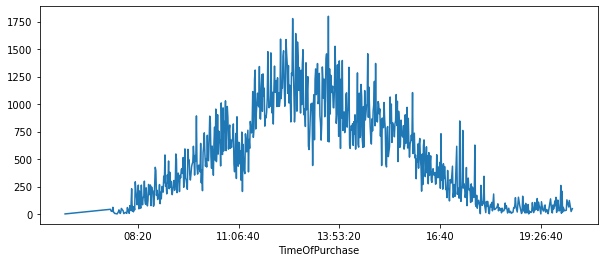

In [46]:
time_of_purchase = df.groupby("TimeOfPurchase")["TimeOfPurchase"].agg("count")
time_of_purchase.plot(figsize=(10,4))

In [47]:
cohort_counts = df.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].nunique().unstack()
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

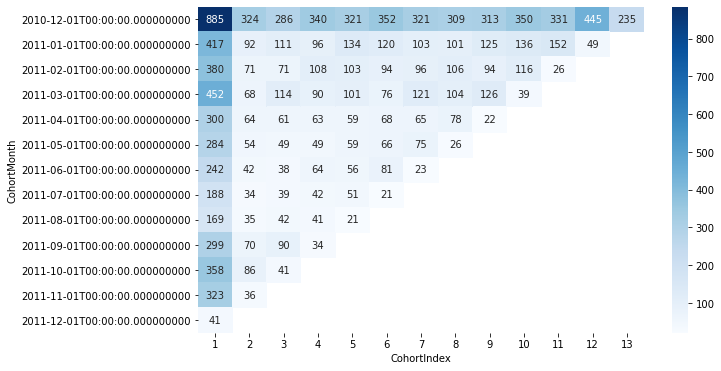

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(cohort_counts, cmap="Blues", annot=True, fmt=".0f")

In [49]:
cohort_counts.div(cohort_counts[1], axis=0).round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cohort_sizes = cohort_counts[1]
retention = cohort_counts.div(cohort_sizes, axis=0)
retention_round = retention.round(3) * 100
retention_round

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
retention_round.index = retention_round.index.date
retention_round.index

Index([2010-12-01, 2011-01-01, 2011-02-01, 2011-03-01, 2011-04-01, 2011-05-01,
       2011-06-01, 2011-07-01, 2011-08-01, 2011-09-01, 2011-10-01, 2011-11-01,
       2011-12-01],
      dtype='object')

<AxesSubplot:xlabel='CohortIndex'>

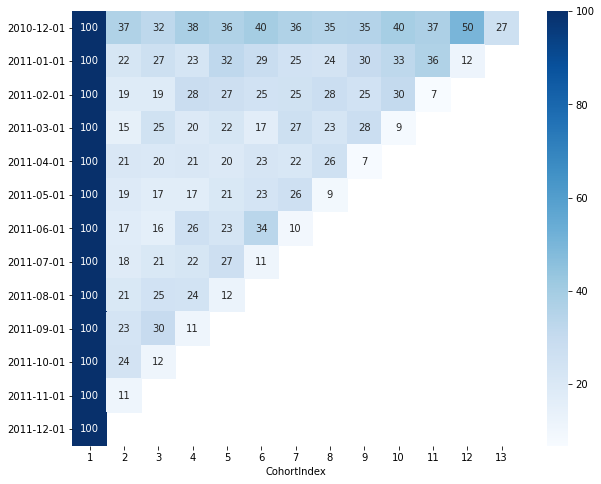

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(retention_round, annot=True, cmap="Blues", fmt='.0f')

In [53]:
# del df["TimeOfPurchase"]

In [54]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [55]:
df["InvoiceDate"].max() + dt.timedelta(days=1)

Timestamp('2011-12-10 12:50:00')

In [56]:
last_timestamp = df["InvoiceDate"].max() + dt.timedelta(days=1)   
                                        # 왜 dt.timedelta(days=1)을 더했나?
last_timestamp

Timestamp('2011-12-10 12:50:00')

In [57]:
rfm = df.groupby("CustomerID").agg({ "InvoiceDate" : lambda x : (last_timestamp - x.max()).days,
                                   "InvoiceNo" : "count",
                                   "TotalCost" : "sum"})
rfm

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [58]:
rfm = rfm.rename(columns = {"InvoiceDate" : "Recency",
                          "InvoiceNo" : "Frequency",
                          "TotalCost" : "MonetaryValue"})
rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [59]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [60]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


In [61]:
list(range(1,5))

[1, 2, 3, 4]

In [62]:
r_labels = range(4,0,-1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [63]:
pd.qcut(rfm["MonetaryValue"], q=4, labels=m_labels)

CustomerID
12346.0    4
12347.0    4
12348.0    4
12349.0    4
12350.0    2
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    4
18287.0    4
Name: MonetaryValue, Length: 4338, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [64]:
r_quantiles = pd.qcut(rfm["Recency"], q=4, labels=r_labels)
f_quantiles = pd.qcut(rfm["Frequency"], q=4, labels=f_labels)
m_quantiles = pd.qcut(rfm["MonetaryValue"], q=4, labels=m_labels)

In [65]:
rfm = rfm.assign(R=r_quantiles, F=f_quantiles, M=m_quantiles)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,12,178.05,4,1,1


In [66]:
def add_rfm(x): return str(x["R"]) + str(x["F"]) + str(x["M"])

In [67]:
rfm["RFM_Segment"] = rfm.apply(add_rfm, axis=1)
rfm["RFM_Score"] = rfm[["R", "F", "M"]].sum(axis=1)

rfm.tail()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
18280.0,278,10,180.60,1,1,1,1.01.01.0,3
18281.0,181,7,80.82,1,1,1,1.01.01.0,3
18282.0,8,12,178.05,4,1,1,4.01.01.0,6
18283.0,4,721,2045.53,4,4,4,4.04.04.0,12
18287.0,43,70,1837.28,3,3,4,3.03.04.0,10


In [68]:
rfm.groupby("RFM_Score").agg({"Recency" : "mean",
                              "Frequency" : "mean",
                              "MonetaryValue" : "mean"}).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,260.6,8.2,157.0
4,177.2,13.6,240.0
5,152.9,21.2,366.6
6,96.1,28.0,820.1
7,79.6,37.9,759.3
8,64.0,55.9,986.6
9,46.1,78.9,1391.5
10,32.4,110.5,2056.4
11,21.3,186.9,4062.0


In [69]:
def segments(df):
    if df["RFM_Score"] > 9 :
        return "Top"
    elif (df["RFM_Score"] > 5 ) & (df["RFM_Score"] <=9):
        return "Middle"
    else:
        return 'Low'


In [70]:
rfm["General_Segment"] = rfm.apply(segments,axis=1)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Top
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Low
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Low
18282.0,8,12,178.05,4,1,1,4.01.01.0,6,Middle


In [71]:
rfm.groupby("General_Segment").agg({"Recency" : "mean",
                                    "Frequency" : "mean",
                                    "MonetaryValue" : ["mean","count"]}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               192.2      15.1         266.3  1288
Middle             72.1      49.4         978.8  1787
Top                20.1     225.6        5246.8  1263

In [72]:
rfm.groupby("General_Segment").agg({"MonetaryValue" : "count"})/4338 * 100

,MonetaryValue
General_Segment,
Low,29.691102
Middle,41.194099
Top,29.114799


In [73]:
rfm_cluster = rfm.iloc[:,0:3]
rfm_cluster

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [74]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

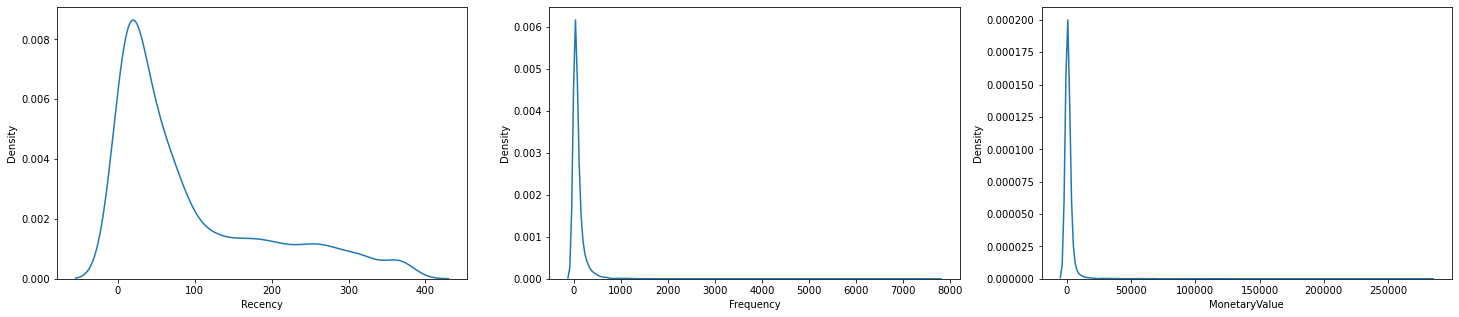

In [75]:
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.kdeplot(rfm_cluster['Recency'])
plt.subplot(1, 3, 2); sns.kdeplot(rfm_cluster['Frequency'])
plt.subplot(1, 3, 3); sns.kdeplot(rfm_cluster['MonetaryValue'])

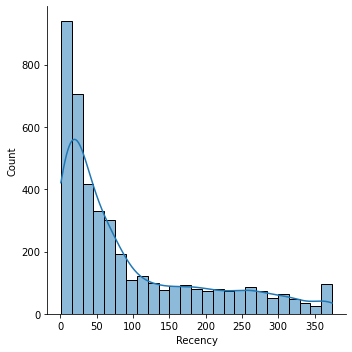

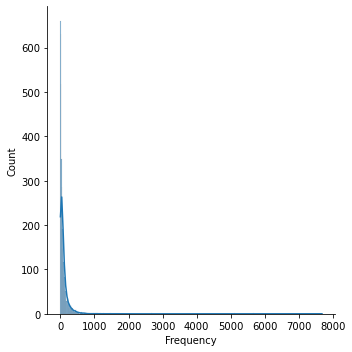

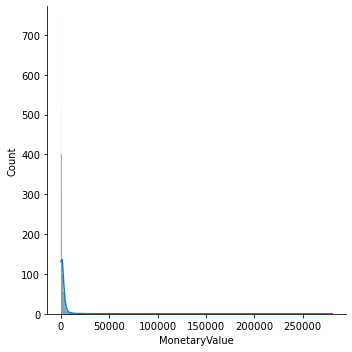

In [76]:
# f,ax = plt.subplots(figsize=(25, 5))
# plt.subplot(1, 3, 1);
sns.displot(data=rfm_cluster["Recency"], kde=True)
# plt.subplot(1, 3, 2);
sns.displot(data=rfm_cluster["Frequency"], kde=True)
# plt.subplot(1, 3, 3);
sns.displot(data=rfm_cluster["MonetaryValue"], kde=True)

In [77]:
rfm_cluster_log = np.log(rfm_cluster)

In [78]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


In [79]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.768762,3.671429,6.583176
std,1.431498,1.321051,1.261833
min,0.000000,0.000000,1.064711
25%,2.890372,2.833213,5.725063
50%,3.931826,3.713572,6.505029
75%,4.961090,4.584967,7.414050
max,5.924256,8.945854,12.543280


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

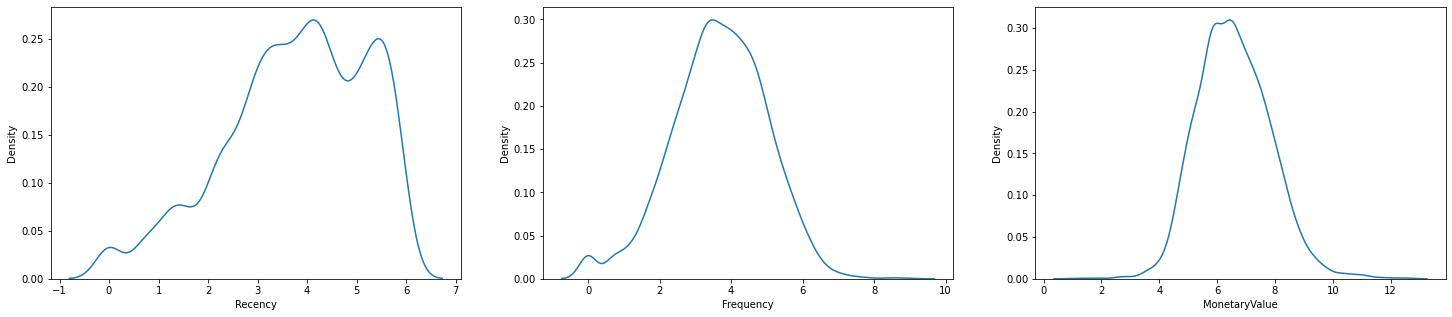

In [80]:
f,ax = plt.subplots(figsize=(25,5))
plt.subplot(1,3,1); sns.kdeplot(rfm_cluster_log["Recency"])
plt.subplot(1,3,2); sns.kdeplot(rfm_cluster_log["Frequency"])
plt.subplot(1,3,3); sns.kdeplot(rfm_cluster_log["MonetaryValue"])

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(rfm_cluster_log)

StandardScaler()

In [84]:
rfm_norm = scaler.fit_transform(rfm_cluster_log)
rfm_norm

array([[ 1.40996938, -2.7794934 ,  3.70200042],
       [-2.14877676,  1.16025413,  1.41518244],
       [ 0.3833673 , -0.17975758,  0.72191575],
       ...,
       [-1.18024287, -0.89826891, -1.11050589],
       [-1.66450982,  2.20244808,  0.8244806 ],
       [-0.00528304,  0.43687422,  0.73937971]])

In [85]:
rfm_norm = pd.DataFrame(data=rfm_norm, index=rfm_cluster_log.index,
                       columns=rfm_cluster_log.columns)

In [86]:
rfm_norm.describe()

,Recency,Frequency,MonetaryValue
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,-3.135241e-16,6.395683e-17,4.215418e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.633044e+00,-2.779493e+00,-4.373877e+00
25%,-6.136869e-01,-6.345797e-01,-6.801311e-01
50%,1.139244e-01,3.190506e-02,-6.193819e-02
75%,8.330196e-01,6.916040e-01,6.585423e-01
max,1.505935e+00,3.993059e+00,4.723916e+00


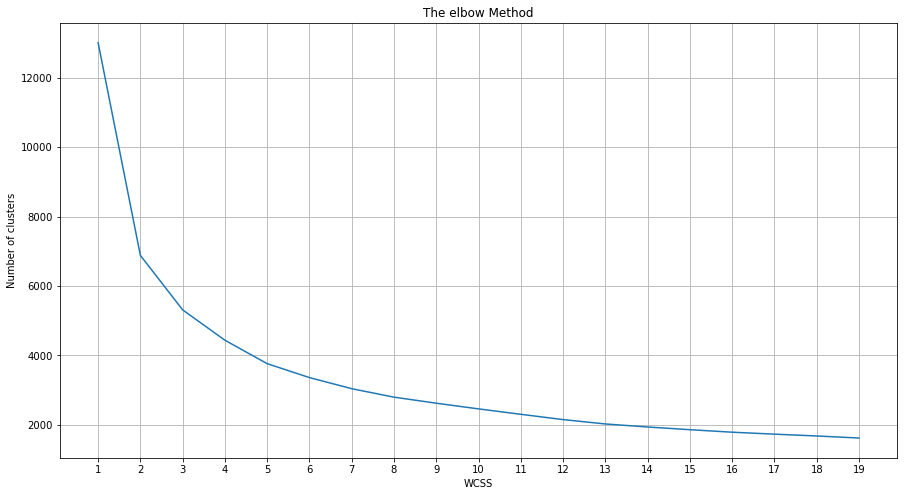

In [87]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state = 42 )
    kmeans.fit(rfm_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,20), wcss)
plt.title("The elbow Method")
plt.ylabel("Number of clusters")
plt.xlabel('WCSS')
plt.xticks(range(1,20))
plt.grid(True)
plt.show()

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_norm)

KMeans(n_clusters=5)

In [89]:
kmeans.cluster_centers_

array([[ 0.81705802, -0.31417408, -0.41520516],
       [-1.38084655,  1.30130278,  1.40098766],
       [ 0.08806455,  0.63781476,  0.62922099],
       [ 0.72269472, -1.4941577 , -1.24493409],
       [-0.84279621, -0.13819616, -0.28256102]])

In [90]:
kmeans.labels_

array([2, 1, 2, ..., 4, 1, 2])

In [91]:
rfm['Cluster'] = kmeans.labels_
rfm.sample(20)
# 0~4 : 5개

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
17348.0,15,213,1156.60,4,4,3,4.04.03.0,11,Top,2
15854.0,4,138,2969.12,4,4,4,4.04.04.0,12,Top,1
12950.0,2,23,1843.00,4,2,4,4.02.04.0,10,Top,4
13081.0,12,1024,28337.38,4,4,4,4.04.04.0,12,Top,1
17633.0,31,70,1324.84,3,3,3,3.03.03.0,9,Middle,2
12442.0,3,12,172.06,4,1,1,4.01.01.0,6,Middle,4
18106.0,330,37,421.90,1,2,2,1.02.02.0,5,Low,0
17985.0,22,21,631.35,3,2,2,3.02.02.0,7,Middle,4
16483.0,192,19,139.35,1,2,1,1.02.01.0,4,Low,0


In [92]:
rfm.groupby('Cluster').agg({"Recency" : "mean",
                            "Frequency" : "mean",
                            "MonetaryValue" : ["mean","count"]}).round(0)

# 어떤 클러스터가 성능이 크게 향상되었는가? 그 기준이 무엇인가?
# rfm과 유사성? 그럼 2번 클러스터가 가장 성능이 좋은가? 

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         168.0      30.0         511.0  1194
1           9.0     316.0        8128.0   664
2          63.0     109.0        2049.0  1019
3         169.0       7.0         199.0   695
4          17.0      41.0         632.0   766

In [93]:
rfm.describe()

,Recency,Frequency,MonetaryValue,RFM_Score,Cluster
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.00000
mean,92.583679,90.523513,2009.852304,7.501153,1.80982
std,100.019339,225.507058,8622.507371,2.817339,1.44391
min,1.000000,1.000000,2.900000,3.000000,0.00000
25%,18.000000,17.000000,306.452500,5.000000,0.00000
50%,51.000000,41.000000,668.495000,7.000000,2.00000
75%,142.750000,98.000000,1659.132500,10.000000,3.00000
max,374.000000,7676.000000,280206.020000,12.000000,4.00000


In [107]:
df_trim = df.iloc[:,[6,7,8,9,11]]
df_trim

,CustomerID,Country,id_null,TotalCost,CohortMonth
0,17850.0,United Kingdom,0,15.30,2010-12-01
1,17850.0,United Kingdom,0,20.34,2010-12-01
2,17850.0,United Kingdom,0,22.00,2010-12-01
3,17850.0,United Kingdom,0,20.34,2010-12-01
4,17850.0,United Kingdom,0,20.34,2010-12-01
...,...,...,...,...,...
541904,12680.0,France,0,10.20,2011-08-01
541905,12680.0,France,0,12.60,2011-08-01
541906,12680.0,France,0,16.60,2011-08-01
541907,12680.0,France,0,16.60,2011-08-01


In [108]:
df_trim.head()

,CustomerID,Country,id_null,TotalCost,CohortMonth
0,17850.0,United Kingdom,0,15.30,2010-12-01
1,17850.0,United Kingdom,0,20.34,2010-12-01
2,17850.0,United Kingdom,0,22.00,2010-12-01
3,17850.0,United Kingdom,0,20.34,2010-12-01
4,17850.0,United Kingdom,0,20.34,2010-12-01


In [96]:
mean_clus = rfm.groupby('Cluster').mean()
pop_avg = rfm.mean()
relative_imp = mean_clus / pop_avg -1
relative_imp = relative_imp.dropna(axis=1).iloc[:,[3,0,1]]

In [97]:
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.814493,-0.665948,-0.745538
1,-0.901131,2.487595,3.044049
2,-0.320054,0.199651,0.019534
3,0.826992,-0.922942,-0.900758
4,-0.813026,-0.546502,-0.685319


<AxesSubplot:ylabel='Cluster'>

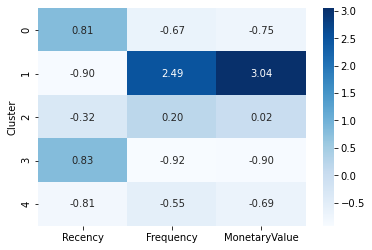

In [98]:
sns.heatmap(relative_imp, annot=True, fmt='.2f', cmap="Blues")

In [99]:
rfm_c1 = rfm[rfm["Cluster"] == 0]
rfm_c2 = rfm[rfm["Cluster"] == 1]
rfm_c3 = rfm[rfm["Cluster"] == 2]
rfm_c4 = rfm[rfm["Cluster"] == 3]
rfm_c5 = rfm[rfm["Cluster"] == 4]

In [100]:
rfm_c1

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low,0
12354.0,232,58,1079.40,1,3,3,1.03.03.0,7,Middle,0
12355.0,214,13,459.40,1,1,2,1.01.02.0,4,Low,0
12363.0,110,23,552.00,2,2,2,2.02.02.0,6,Middle,0
12365.0,291,22,641.38,1,2,2,1.02.02.0,5,Low,0
...,...,...,...,...,...,...,...,...,...,...
18232.0,82,37,592.97,2,2,2,2.02.02.0,6,Middle,0
18248.0,123,47,804.02,2,3,3,2.03.03.0,8,Middle,0
18250.0,310,21,349.27,1,2,2,1.02.02.0,5,Low,0


In [101]:
rfm_c1.groupby(['General_Segment']).agg({"Recency":"mean",
                                         "Frequency":"mean",
                                         "MonetaryValue":["mean","count"]}).round()

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               214.0      23.0         358.0   614
Middle            120.0      37.0         674.0   580

In [102]:
rfm_c2.groupby(['General_Segment']).agg({"Recency":"mean",
                                         "Frequency":"mean",
                                         "MonetaryValue":["mean","count"]}).round()

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Middle              3.0       9.0       12394.0     1
Top                 9.0     316.0        8122.0   663

In [103]:
rfm_c3.groupby(['General_Segment']).agg({"Recency":"mean",
                                         "Frequency":"mean",
                                         "MonetaryValue":["mean","count"]}).round()

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Middle             82.0      80.0        1769.0   565
Top                40.0     144.0        2398.0   454

In [104]:
rfm_c4.groupby(['General_Segment']).agg({"Recency":"mean",
                                         "Frequency":"mean",
                                         "MonetaryValue":["mean","count"]}).round()

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               179.0       7.0         181.0   646
Middle             38.0       4.0         449.0    49

In [105]:
rfm_c5.groupby(['General_Segment']).agg({"Recency":"mean",
                                         "Frequency":"mean",
                                         "MonetaryValue":["mean","count"]}).round()

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low                25.0      14.0         233.0    28
Middle             19.0      35.0         548.0   592
Top                 9.0      69.0        1051.0   146

In [109]:
df_trim

,CustomerID,Country,id_null,TotalCost,CohortMonth
0,17850.0,United Kingdom,0,15.30,2010-12-01
1,17850.0,United Kingdom,0,20.34,2010-12-01
2,17850.0,United Kingdom,0,22.00,2010-12-01
3,17850.0,United Kingdom,0,20.34,2010-12-01
4,17850.0,United Kingdom,0,20.34,2010-12-01
...,...,...,...,...,...
541904,12680.0,France,0,10.20,2011-08-01
541905,12680.0,France,0,12.60,2011-08-01
541906,12680.0,France,0,16.60,2011-08-01
541907,12680.0,France,0,16.60,2011-08-01


In [110]:
rfm["CustomerID"] = rfm.index
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster,CustomerID
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6,Middle,2,12346.0
12347.0,2,182,4310.00,4,4,4,4.04.04.0,12,Top,1,12347.0
12348.0,75,31,1797.24,2,2,4,2.02.04.0,8,Middle,2,12348.0
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10,Top,2,12349.0
12350.0,310,17,334.40,1,1,2,1.01.02.0,4,Low,0,12350.0
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1.01.01.0,3,Low,3,18280.0
18281.0,181,7,80.82,1,1,1,1.01.01.0,3,Low,3,18281.0
18282.0,8,12,178.05,4,1,1,4.01.01.0,6,Middle,4,18282.0


In [112]:
rfm = rfm.reset_index(drop=True)

In [115]:
df_rework = pd.merge(df_trim, rfm, on="CustomerID")

In [116]:
df_rework.sample(10)

,CustomerID,Country,id_null,TotalCost,CohortMonth,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
192705,12673.0,Germany,0,14.85,2011-01-01,5,42,610.52,4,3,2,4.03.02.0,9,Middle,4
104293,16385.0,United Kingdom,0,3.30,2010-12-01,60,57,554.86,2,3,2,2.03.02.0,7,Middle,0
304661,12590.0,Germany,0,127.50,2011-05-01,211,68,9864.26,1,3,4,1.03.04.0,8,Middle,2
159238,17315.0,United Kingdom,0,19.90,2010-12-01,2,471,6281.23,4,4,4,4.04.04.0,12,Top,1
193992,12510.0,Spain,0,162.72,2011-01-01,143,33,982.57,1,2,3,1.02.03.0,6,Middle,0
281060,14719.0,United Kingdom,0,14.45,2011-04-01,2,235,1581.84,4,4,3,4.04.03.0,11,Top,1
206428,13098.0,United Kingdom,0,135.00,2011-01-01,1,572,28882.44,4,4,4,4.04.04.0,12,Top,1
56131,13089.0,United Kingdom,0,102.00,2010-12-01,3,1814,58762.08,4,4,4,4.04.04.0,12,Top,1
149662,12577.0,France,0,6.30,2010-12-01,35,146,626.60,3,4,2,3.04.02.0,9,Middle,2
362924,13886.0,United Kingdom,0,10.20,2011-09-01,71,16,243.56,2,1,1,2.01.01.0,4,Low,0
